D:\Temp\Temp\ipykernel_16068\397522234.py:131: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


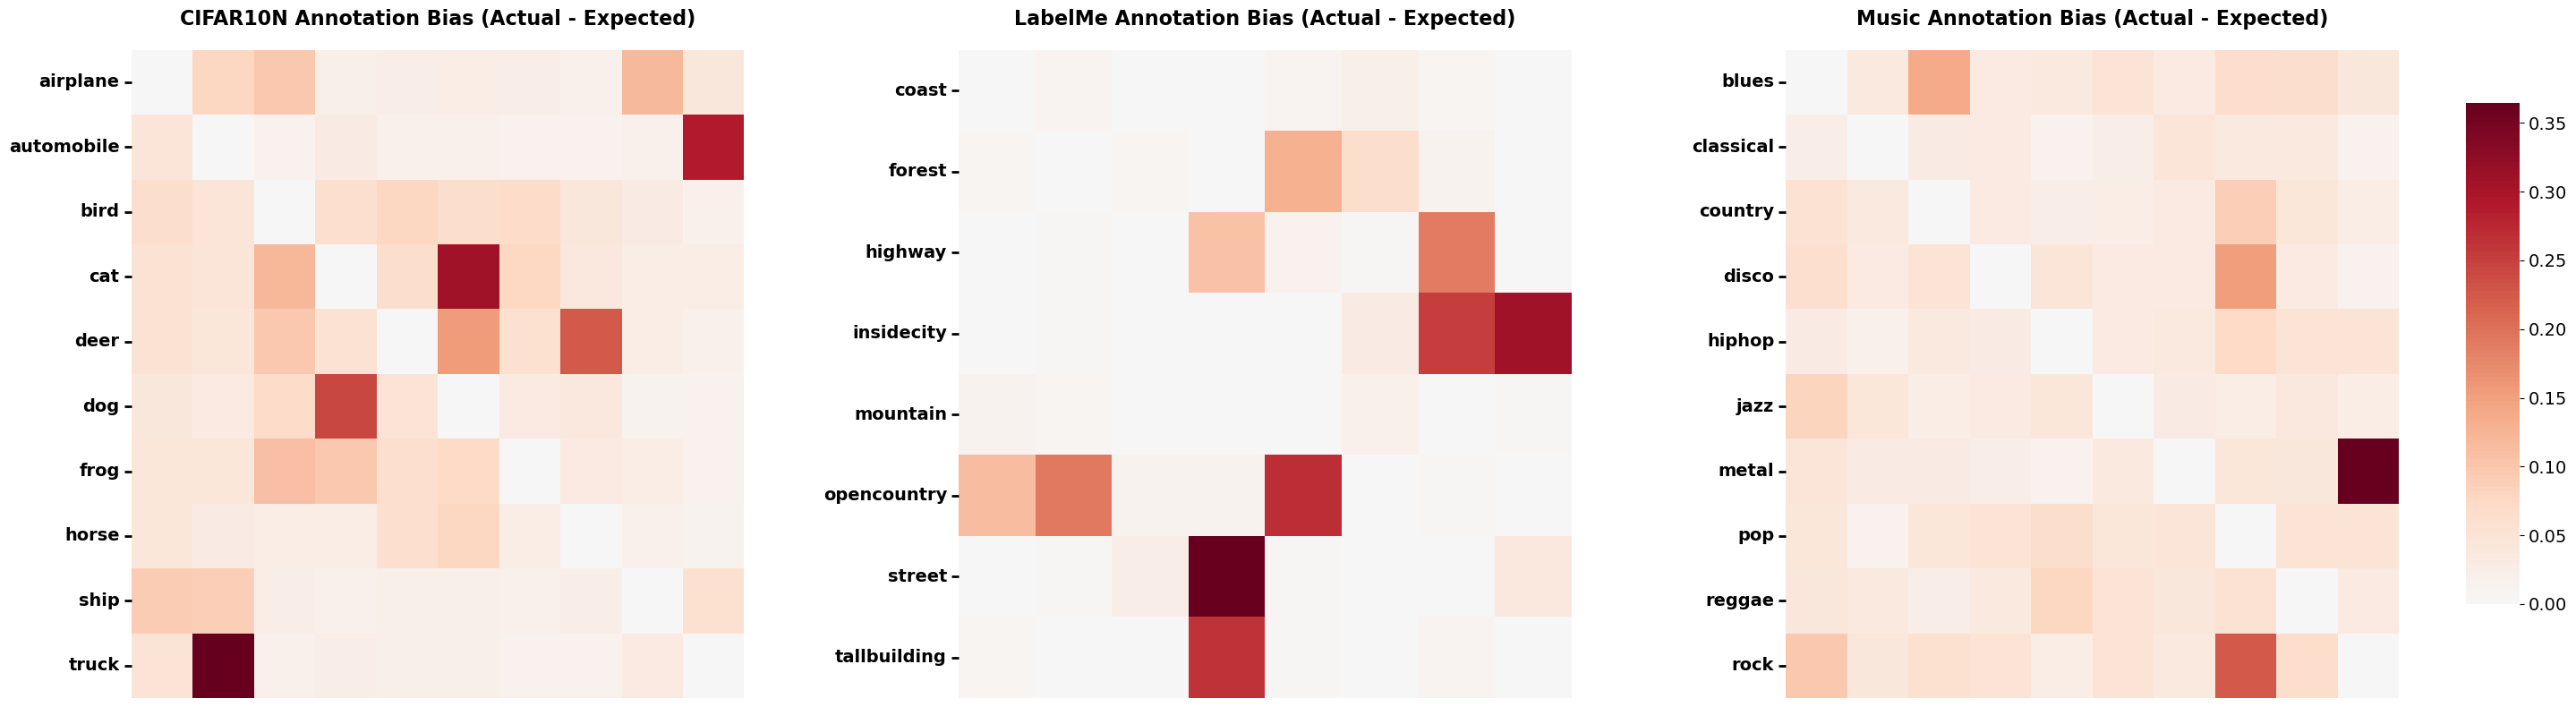

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# 创建子图
fig, axes = plt.subplots(1, 3, figsize=(30, 8))  # 增加图表宽度

# ================== CIFAR10N 处理 ================== #
# 加载数据
answers1 = np.load('../data/cifar10N/raw/answers.npy')
labels1 = np.load('../data/cifar10N/raw/labels_train.npy')

# 计算差异矩阵
confusion_matrix1 = np.zeros((10, 10), dtype=np.int64)
for i in range(len(labels1)):
    true_label = labels1[i]
    annotations = answers1[i]
    valid_annotations = annotations[annotations != -1]
    for ann in valid_annotations:
        confusion_matrix1[true_label, int(ann)] += 1

row_sums1 = confusion_matrix1.sum(axis=1, keepdims=True)
row_sums1[row_sums1 == 0] = 1
percentage_matrix1 = confusion_matrix1 / row_sums1
diagonal_matrix1 = np.diag(np.diag(percentage_matrix1))
diff_matrix1 = percentage_matrix1 - diagonal_matrix1

# ================== LabelMe 处理 ================== #
answers2 = np.load('../data/labelme/train/answers.npy')
labels2 = np.load('../data/labelme/train/labels_train.npy')

confusion_matrix2 = np.zeros((8, 8), dtype=np.int64)
for i in range(len(labels2)):
    true_label = labels2[i]
    annotations = answers2[i]
    valid_annotations = annotations[annotations != -1]
    for ann in valid_annotations:
        confusion_matrix2[true_label, int(ann)] += 1

row_sums2 = confusion_matrix2.sum(axis=1, keepdims=True)
row_sums2[row_sums2 == 0] = 1
percentage_matrix2 = confusion_matrix2 / row_sums2
diagonal_matrix2 = np.diag(np.diag(percentage_matrix2))
diff_matrix2 = percentage_matrix2 - diagonal_matrix2

# ================== Music 处理 ================== #
answers3 = np.load('../data/music/train/answers.npy')
labels3 = np.load('../data/music/train/labels_train.npy')

confusion_matrix3 = np.zeros((10, 10), dtype=np.int64)
for i in range(len(labels3)):
    true_label = labels3[i]
    annotations = answers3[i]
    valid_annotations = annotations[annotations != -1]
    for ann in valid_annotations:
        confusion_matrix3[true_label, int(ann)] += 1

row_sums3 = confusion_matrix3.sum(axis=1, keepdims=True)
row_sums3[row_sums3 == 0] = 1
percentage_matrix3 = confusion_matrix3 / row_sums3
diagonal_matrix3 = np.diag(np.diag(percentage_matrix3))
diff_matrix3 = percentage_matrix3 - diagonal_matrix3

# ================== 可视化设置 ================== #
# 绘制热图
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # 自定义颜色条位置

sns.heatmap(diff_matrix1, ax=axes[0], cmap="RdBu_r", center=0, annot=False, cbar_ax=cbar_ax)
sns.heatmap(diff_matrix2, ax=axes[1], cmap="RdBu_r", center=0, annot=False, cbar_ax=cbar_ax)
sns.heatmap(diff_matrix3, ax=axes[2], cmap="RdBu_r", center=0, annot=False, cbar_ax=cbar_ax)

# 统一设置子图样式
for ax in axes:
    # 设置黑色边框
    for spine in ax.spines.values():
        spine.set_color('black')
        spine.set_linewidth(2)
    
    # 设置刻度样式
    ax.tick_params(
        axis='y', 
        labelsize=14,
        width=2,
        length=6,
        labelcolor='black'
    )
    ax.set_xticks([])

# 设置标签文本
cifar10n_labels = [
    "airplane", "automobile", "bird", "cat", "deer", 
    "dog", "frog", "horse", "ship", "truck"
]
labelme_labels = [
    "coast", "forest", "highway", "insidecity", "mountain", 
    "opencountry", "street", "tallbuilding"
]
music_labels = [
    "blues", "classical", "country", "disco", "hiphop", 
    "jazz", "metal", "pop", "reggae", "rock"
]

# 修复后的标签设置函数
def set_labels(ax, labels):
    ax.set_yticks(np.arange(len(labels)) + 0.5)
    ax.set_yticklabels(
        labels,
        rotation=0,
        fontsize=14,
        fontweight='bold',
        color='black',
        verticalalignment='center'
    )

set_labels(axes[0], cifar10n_labels)
set_labels(axes[1], labelme_labels)
set_labels(axes[2], music_labels)

# 设置标题
titles = ['CIFAR10N', 'LabelMe', 'Music']
for ax, title in zip(axes, titles):
    ax.set_title(
        f'{title} Annotation Deviation (Actual - Expected)',
        fontsize=16,
        fontweight='bold',
        pad=20
    )

# 调整布局
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.subplots_adjust(wspace=0.35)  # 增加子图间距

# 设置颜色条样式
cbar_ax.tick_params(axis='y', labelsize=14)
cbar_ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.2f}'))

# 保存输出
plt.savefig('heatmap_output.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

D:\Temp\Temp\ipykernel_16068\2682334653.py:139: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])  # 为总标题留出空间


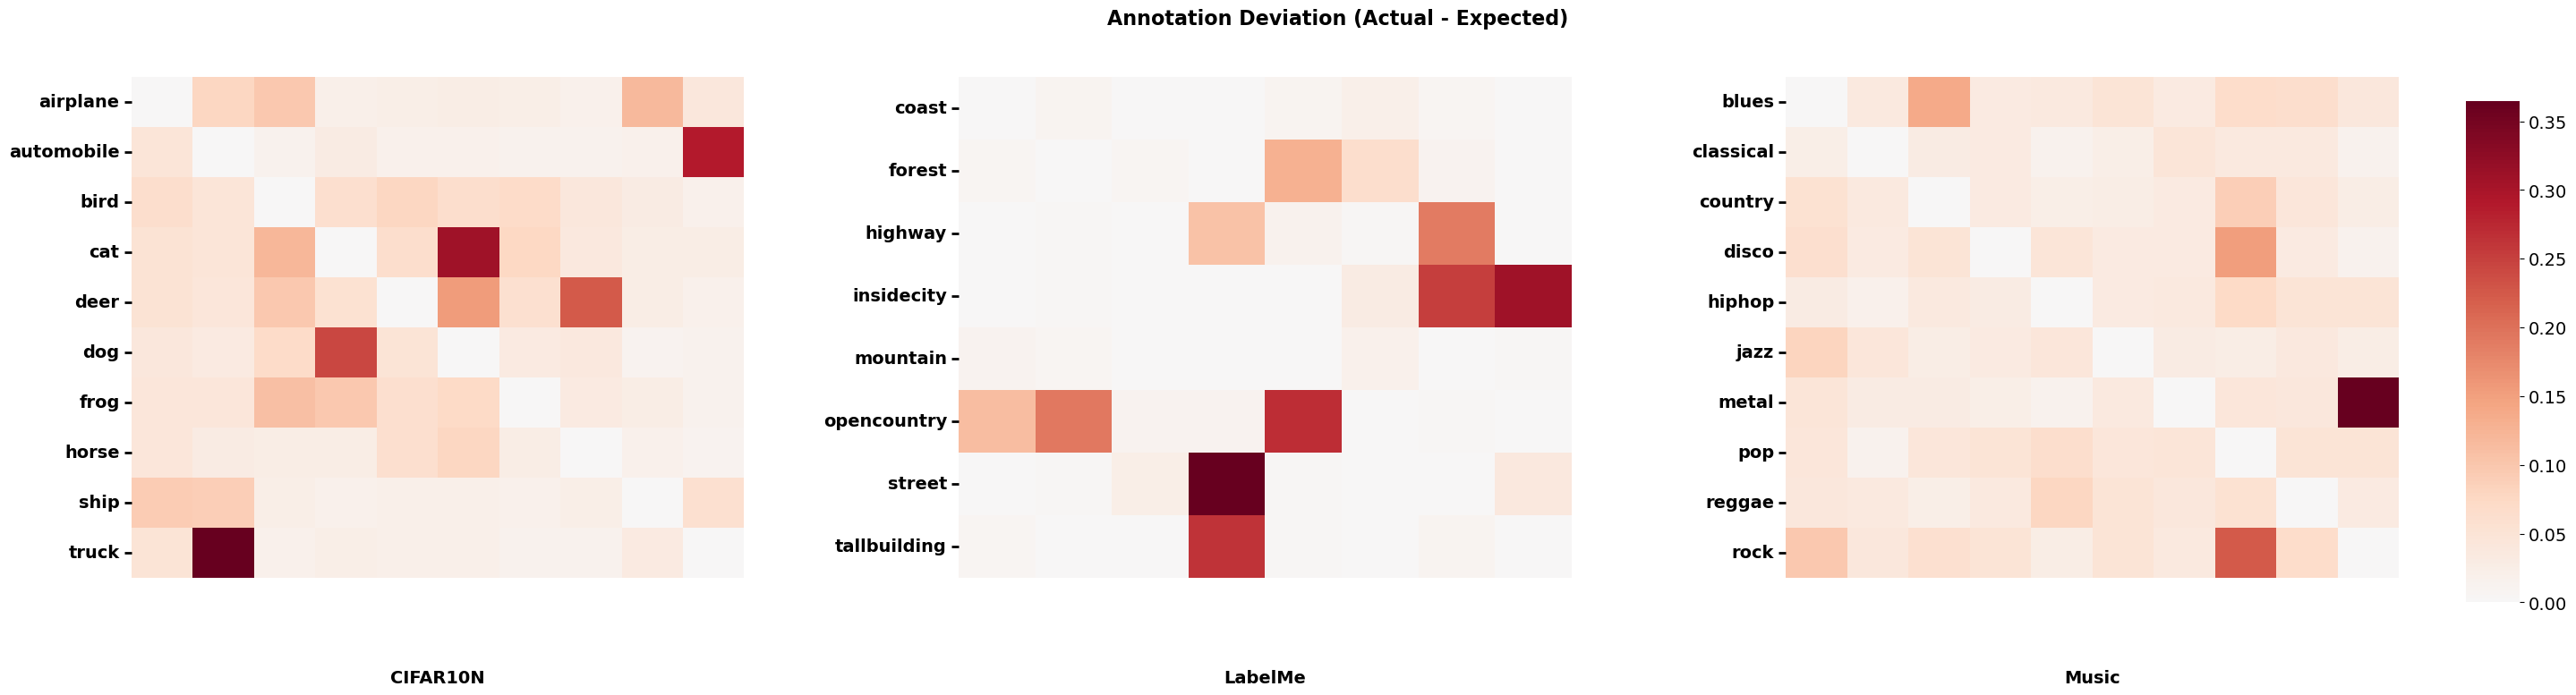

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# 创建子图
fig, axes = plt.subplots(1, 3, figsize=(30, 8))  # 增加图表宽度

# ================== CIFAR10N 处理 ================== #
# 加载数据
answers1 = np.load('../data/cifar10N/raw/answers.npy')
labels1 = np.load('../data/cifar10N/raw/labels_train.npy')

# 计算差异矩阵
confusion_matrix1 = np.zeros((10, 10), dtype=np.int64)
for i in range(len(labels1)):
    true_label = labels1[i]
    annotations = answers1[i]
    valid_annotations = annotations[annotations != -1]
    for ann in valid_annotations:
        confusion_matrix1[true_label, int(ann)] += 1

row_sums1 = confusion_matrix1.sum(axis=1, keepdims=True)
row_sums1[row_sums1 == 0] = 1
percentage_matrix1 = confusion_matrix1 / row_sums1
diagonal_matrix1 = np.diag(np.diag(percentage_matrix1))
diff_matrix1 = percentage_matrix1 - diagonal_matrix1

# ================== LabelMe 处理 ================== #
answers2 = np.load('../data/labelme/train/answers.npy')
labels2 = np.load('../data/labelme/train/labels_train.npy')

confusion_matrix2 = np.zeros((8, 8), dtype=np.int64)
for i in range(len(labels2)):
    true_label = labels2[i]
    annotations = answers2[i]
    valid_annotations = annotations[annotations != -1]
    for ann in valid_annotations:
        confusion_matrix2[true_label, int(ann)] += 1

row_sums2 = confusion_matrix2.sum(axis=1, keepdims=True)
row_sums2[row_sums2 == 0] = 1
percentage_matrix2 = confusion_matrix2 / row_sums2
diagonal_matrix2 = np.diag(np.diag(percentage_matrix2))
diff_matrix2 = percentage_matrix2 - diagonal_matrix2

# ================== Music 处理 ================== #
answers3 = np.load('../data/music/train/answers.npy')
labels3 = np.load('../data/music/train/labels_train.npy')

confusion_matrix3 = np.zeros((10, 10), dtype=np.int64)
for i in range(len(labels3)):
    true_label = labels3[i]
    annotations = answers3[i]
    valid_annotations = annotations[annotations != -1]
    for ann in valid_annotations:
        confusion_matrix3[true_label, int(ann)] += 1

row_sums3 = confusion_matrix3.sum(axis=1, keepdims=True)
row_sums3[row_sums3 == 0] = 1
percentage_matrix3 = confusion_matrix3 / row_sums3
diagonal_matrix3 = np.diag(np.diag(percentage_matrix3))
diff_matrix3 = percentage_matrix3 - diagonal_matrix3

# ================== 可视化设置 ================== #
# 绘制热图
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # 自定义颜色条位置

sns.heatmap(diff_matrix1, ax=axes[0], cmap="RdBu_r", center=0, annot=False, cbar_ax=cbar_ax)
sns.heatmap(diff_matrix2, ax=axes[1], cmap="RdBu_r", center=0, annot=False, cbar_ax=cbar_ax)
sns.heatmap(diff_matrix3, ax=axes[2], cmap="RdBu_r", center=0, annot=False, cbar_ax=cbar_ax)

# 统一设置子图样式
for ax in axes:
    # 设置黑色边框
    for spine in ax.spines.values():
        spine.set_color('black')
        spine.set_linewidth(2)
    
    # 设置刻度样式
    ax.tick_params(
        axis='y', 
        labelsize=14,
        width=2,
        length=6,
        labelcolor='black'
    )
    ax.set_xticks([])

# 设置标签文本
cifar10n_labels = [
    "airplane", "automobile", "bird", "cat", "deer", 
    "dog", "frog", "horse", "ship", "truck"
]
labelme_labels = [
    "coast", "forest", "highway", "insidecity", "mountain", 
    "opencountry", "street", "tallbuilding"
]
music_labels = [
    "blues", "classical", "country", "disco", "hiphop", 
    "jazz", "metal", "pop", "reggae", "rock"
]

# 修复后的标签设置函数
def set_labels(ax, labels):
    ax.set_yticks(np.arange(len(labels)) + 0.5)
    ax.set_yticklabels(
        labels,
        rotation=0,
        fontsize=14,
        fontweight='bold',
        color='black',
        verticalalignment='center'
    )

set_labels(axes[0], cifar10n_labels)
set_labels(axes[1], labelme_labels)
set_labels(axes[2], music_labels)

# 设置主标题
main_title = 'Annotation Deviation (Actual - Expected)'
plt.suptitle(main_title, fontsize=16, fontweight='bold')

# 设置子图下方的标题
titles = ['CIFAR10N', 'LabelMe', 'Music']
for ax, title in zip(axes, titles):
    ax.text(
        0.5,  # x 坐标 (相对于子图)
        -0.2,  # y 坐标 (相对于子图)
        title,
        fontsize=14,
        fontweight='bold',
        ha='center',
        va='center',
        transform=ax.transAxes
    )

# 调整布局
plt.tight_layout(rect=[0, 0, 0.9, 0.95])  # 为总标题留出空间
plt.subplots_adjust(wspace=0.35)  # 增加子图间距

# 设置颜色条样式
cbar_ax.tick_params(axis='y', labelsize=14)
cbar_ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.2f}'))

# 保存输出
plt.savefig('heatmap_output.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

D:\Temp\Temp\ipykernel_16068\3351686717.py:144: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # 调整整体布局


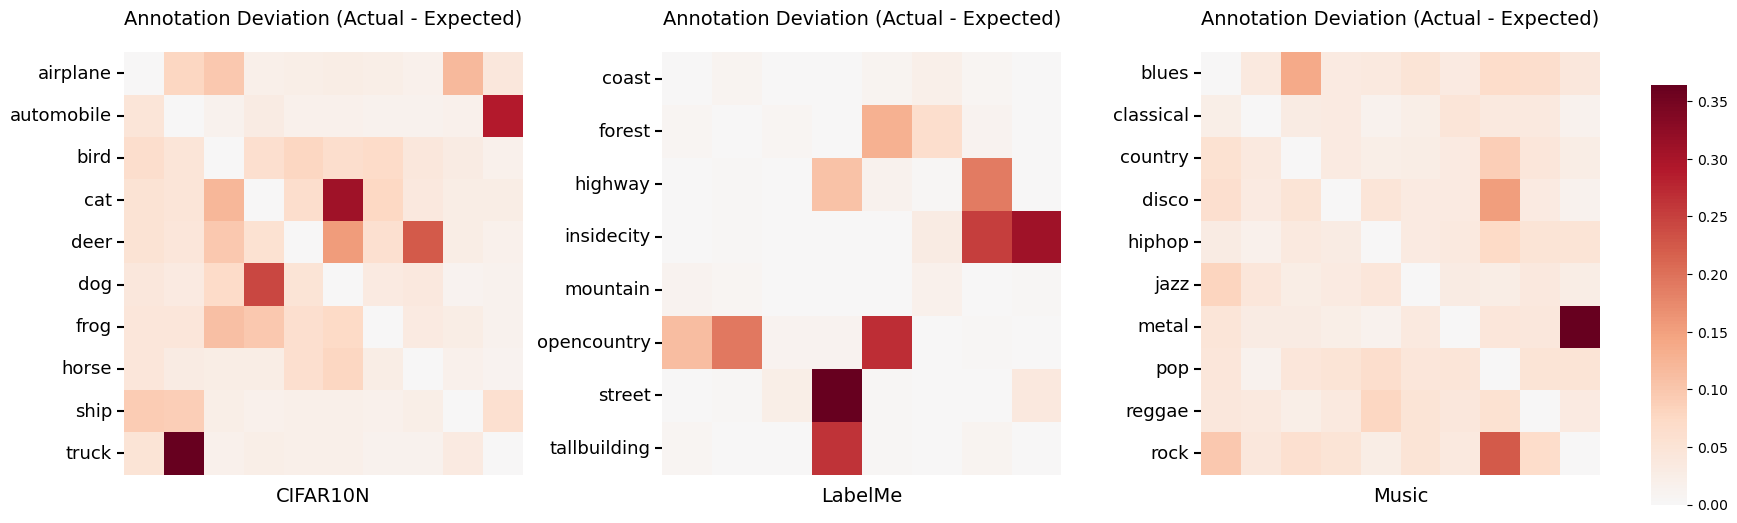

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# 创建子图
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 调整为适合双栏布局的尺寸

# ================== CIFAR10N 处理 ================== #
# 加载数据
answers1 = np.load('../data/cifar10N/raw/answers.npy')
labels1 = np.load('../data/cifar10N/raw/labels_train.npy')

# 计算差异矩阵
confusion_matrix1 = np.zeros((10, 10), dtype=np.int64)
for i in range(len(labels1)):
    true_label = labels1[i]
    annotations = answers1[i]
    valid_annotations = annotations[annotations != -1]
    for ann in valid_annotations:
        confusion_matrix1[true_label, int(ann)] += 1

row_sums1 = confusion_matrix1.sum(axis=1, keepdims=True)
row_sums1[row_sums1 == 0] = 1
percentage_matrix1 = confusion_matrix1 / row_sums1
diagonal_matrix1 = np.diag(np.diag(percentage_matrix1))
diff_matrix1 = percentage_matrix1 - diagonal_matrix1

# ================== LabelMe 处理 ================== #
answers2 = np.load('../data/labelme/train/answers.npy')
labels2 = np.load('../data/labelme/train/labels_train.npy')

confusion_matrix2 = np.zeros((8, 8), dtype=np.int64)
for i in range(len(labels2)):
    true_label = labels2[i]
    annotations = answers2[i]
    valid_annotations = annotations[annotations != -1]
    for ann in valid_annotations:
        confusion_matrix2[true_label, int(ann)] += 1

row_sums2 = confusion_matrix2.sum(axis=1, keepdims=True)
row_sums2[row_sums2 == 0] = 1
percentage_matrix2 = confusion_matrix2 / row_sums2
diagonal_matrix2 = np.diag(np.diag(percentage_matrix2))
diff_matrix2 = percentage_matrix2 - diagonal_matrix2

# ================== Music 处理 ================== #
answers3 = np.load('../data/music/train/answers.npy')
labels3 = np.load('../data/music/train/labels_train.npy')

confusion_matrix3 = np.zeros((10, 10), dtype=np.int64)
for i in range(len(labels3)):
    true_label = labels3[i]
    annotations = answers3[i]
    valid_annotations = annotations[annotations != -1]
    for ann in valid_annotations:
        confusion_matrix3[true_label, int(ann)] += 1

row_sums3 = confusion_matrix3.sum(axis=1, keepdims=True)
row_sums3[row_sums3 == 0] = 1
percentage_matrix3 = confusion_matrix3 / row_sums3
diagonal_matrix3 = np.diag(np.diag(percentage_matrix3))
diff_matrix3 = percentage_matrix3 - diagonal_matrix3

# ================== 可视化设置 ================== #
# 绘制热图
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # 自定义颜色条位置

sns.heatmap(diff_matrix1, ax=axes[0], cmap="RdBu_r", center=0, annot=False, cbar_ax=cbar_ax)
sns.heatmap(diff_matrix2, ax=axes[1], cmap="RdBu_r", center=0, annot=False, cbar_ax=cbar_ax)
sns.heatmap(diff_matrix3, ax=axes[2], cmap="RdBu_r", center=0, annot=False, cbar_ax=cbar_ax)

# 统一设置子图样式
for ax in axes:
    # 设置黑色边框
    for spine in ax.spines.values():
        spine.set_color('black')
        spine.set_linewidth(1.5)
    
    # 设置刻度样式
    ax.tick_params(
        axis='y', 
        labelsize=10,
        width=1.5,
        length=5,
        labelcolor='black'
    )
    ax.set_xticks([])

# 设置标签文本
cifar10n_labels = [
    "airplane", "automobile", "bird", "cat", "deer", 
    "dog", "frog", "horse", "ship", "truck"
]
labelme_labels = [
    "coast", "forest", "highway", "insidecity", "mountain", 
    "opencountry", "street", "tallbuilding"
]
music_labels = [
    "blues", "classical", "country", "disco", "hiphop", 
    "jazz", "metal", "pop", "reggae", "rock"
]

# 修复后的标签设置函数
def set_labels(ax, labels):
    ax.set_yticks(np.arange(len(labels)) + 0.5)
    ax.set_yticklabels(
        labels,
        rotation=0,
        fontsize=13,
        fontweight='normal',
        color='black',
        verticalalignment='center'
    )

set_labels(axes[0], cifar10n_labels)
set_labels(axes[1], labelme_labels)
set_labels(axes[2], music_labels)

# 设置每个子图上方的主标题
main_title = 'Annotation Deviation (Actual - Expected)'

# 为每个子图设置上方的主标题和下方的子标题
titles = ['CIFAR10N', 'LabelMe', 'Music']
for ax, title in zip(axes, titles):
    ax.set_title(
        main_title,
        fontsize=14,
        fontweight='normal',
        pad=20
    )
    ax.text(
        0.5,  # x 坐标 (相对于子图)
        -0.05,  # y 坐标 (相对于子图)
        title,
        fontsize=14,
        fontweight='normal',
        ha='center',
        va='center',
        transform=ax.transAxes
    )

# 调整布局
plt.tight_layout(rect=[0, 0, 0.9, 1])  # 调整整体布局
plt.subplots_adjust(wspace=0.35, bottom=0.2)  # 增加子图间距和底部边距

# 设置颜色条样式
cbar_ax.tick_params(axis='y', labelsize=10)
cbar_ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.2f}'))

# 保存输出
plt.savefig('heatmap_output.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()